In [6]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import doctest

#### Загружаем данные из файла json

In [7]:
with open('train_01.json', 'r') as myfile:
    data=myfile.read()
obj = json.loads(data)

In [8]:
obj

{'inside': [[0.7295200749361322, 0.7286337326606256],
  [0.826505923560258, 0.9403158114766519],
  [0.6023139955320228, 0.4890999051968531],
  [0.7924301535257385, 0.9724603339895345],
  [0.3739062132424882, 0.3807945141554343],
  [0.5213825315815278, 0.7011647516840395],
  [0.5799489554848042, 0.860210492806848],
  [0.4472712889659769, 0.23208680582951224],
  [0.8266928088733442, 0.9708616047497776],
  [0.2096090384196102, 0.07948946448504302],
  [0.33832612728389067, 0.4113630733104253],
  [0.68383264433507, 0.9003136248995234],
  [0.3974079484193441, 0.44643242592599985],
  [0.26193673674112883, 0.20727182114712916]],
 'outside': [[0.846590438950232, 0.12680486596335516],
  [0.11671041192819076, 0.8523469688748586],
  [0.8939436660435063, 0.20441969005621619],
  [0.196515524259539, 0.7563403480339516],
  [0.762462325724514, 0.17675381094088127],
  [0.8646206065391742, 0.4289513713302239],
  [0.7086382515784717, 0.1718070095596751],
  [0.07308462517167347, 0.7068687883532849],
  [0.7

In [9]:
def get_df(obj):
    df = pd.DataFrame(obj['inside'], columns = ['x', 'y'])
    df['k'] = -1
    for line in obj['outside']:
        df = df.append({'x': line[0], 'y': line[1], 'k': 1}, ignore_index=True)
    return df

In [10]:
df = get_df(obj)

In [11]:
df

,x,y,k
0,0.729520,0.728634,-1.0
1,0.826506,0.940316,-1.0
2,0.602314,0.489100,-1.0
3,0.792430,0.972460,-1.0
4,0.373906,0.380795,-1.0
5,0.521383,0.701165,-1.0
6,0.579949,0.860210,-1.0
7,0.447271,0.232087,-1.0
8,0.826693,0.970862,-1.0
9,0.209609,0.079489,-1.0


#### Выводим график с нашими данными (зеленый - "1" , красный -"-1")

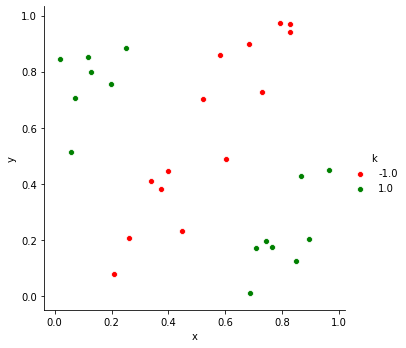

In [12]:
sns.pairplot(x_vars = ["x"],
    y_vars = ["y"],
    data = df,
    hue = "k",
    height = 5,
    palette = {-1:"red", 1:"green"}
)

In [13]:
def tt_split(df):
    df_train, df_test = train_test_split(df, test_size=0.2, random_state=35)
    print(df_train.shape) 
    print(df_test.shape)
    w1 = np.random.sample(6)

    x_train = np.array(df_train[['x', 'y']])
    k_train = np.array(df_train['k'])
    x_test = np.array(df_test[['x', 'y']])
    k_test = np.array(df_test['k'])
    
    return df_train, df_test, w1, x_train, x_test, k_train, k_test

In [14]:
df_train, df_test, w1, x_train, x_test, k_train, k_test = tt_split(df)

(23, 3)
(6, 3)


In [15]:
class Kozinets_alg:

    """
    >>> koz = Kozinets_alg()
    >>> koz.get_x1(np.zeros(2))
    array([1., 0., 0., 0., 0., 0.])
    >>> koz.get_x1([2, 3])
    array([1, 2, 3, 4, 9, 6])
    >>> koz.predict([0, 0, 0, 0, 0, 1], [0, 0, 0, -1, -1, -1], 1)
    0
    >>> koz.predict([0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 1, 1], 1)
    1
    >>> koz.predict([0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 1, 1], -1)
    0
    >>> koz.change_w(np.array([1, 1, 1, 1, 1, 1]), np.array([0, 0, 0, 1, 1, 1]), 1)
    array([0., 0., 0., 1., 1., 1.])
    >>> koz.additional_element(np.array([1, 1, 1, 1, 1, 1]))
    array([[ 0. ,  0. ,  0. ,  0.5,  0.5,  1. ],
           [ 0. ,  0. ,  0. ,  0.5,  0.5, -1. ]])
    >>> koz.predict(np.zeros(6), np.zeros(6), 1)
    1
    >>> koz.additional_element(np.array([1, 1, 1, 1]))
    Traceback (most recent call last):
    ...
    IndexError: index 5 is out of bounds for axis 0 with size 4
    """
    
    def __init__(self):
        pass
    
    def get_x1(self, x):
        return np.array([1, x[0], x[1], x[0]**2, x[1]**2, x[0]*x[1]])
    
    def predict(self, w, x, k):
        activation = k*(np.dot(w, x))
        if activation >= 0: return 1
        else: return 0
    
    def change_w(self, w, x, k):
        g = (np.dot(x, x) - k*np.dot(w, x))/np.dot(w-k*x, w-k*x)
        return g*w + k*(1-g)*x

    def additional_element(self, w1):
        sig = np.array([[w1[3], w1[5]], [w1[5], w1[4]]])
        w, v = np.linalg.eig(sig)
        # w - собственные числа входной матрицы
        # v - собственные векторы входной матрицы
        eig = []
        for vector in v.T:
                eig.append([0,0,0, vector[0]**2, vector[1]**2, 2*vector[1]*vector[0]])
        eig = np.array(eig)
        return eig
    
    def Kozinets_algorythm(self, df, x, k, w1):
        for j in range (0, 200):
            errors = 0
            for i in range (len(df)):
                x1 = self.get_x1(x[i])
                if self.predict(w1, x1, k[i])==0:
                    errors = errors + 1
                    w1 = self.change_w(w1, x1, k[i])
                
            for l in self.additional_element(w1):
                
                if self.predict(w1, l, 1)==0:
                    errors = errors + 1
                    w1 = self.change_w(w1, l, 1)
    
            #print("Step=%d, Errors=%d" % (j, errors))
            if errors == 0: break
                
        #print(w1)
        return w1
    
    def get_plot (self, df, w1):
        fig = plt.figure(figsize=(10,8))
        g = sns.pairplot(x_vars = ["x"],
            y_vars = ["y"],
            data = df,
            hue = "k",
            height = 5,
            palette = {-1:"red", 1:"green"}
        )

        x_plot = np.linspace(min(df['x'])-0.1, max(df['x'])+0.1, 100)
        y_plot = np.linspace(min(df['y'])-0.1, max(df['y'])+0.1, 100)

        x_plot,y_plot = np.meshgrid(x_plot,y_plot)

        Z = w1[0]+x_plot*w1[1] + y_plot*w1[2]+w1[3]*x_plot**2 + w1[4]*y_plot**2 + w1[5]*x_plot*y_plot
        #print(Z)

        plt.contour(x_plot,y_plot,(Z),[0])
    
    
    
    

In [16]:
koz = Kozinets_alg()
w1 = koz.Kozinets_algorythm(df_train, x_train, k_train, w1)

<Figure size 720x576 with 0 Axes>

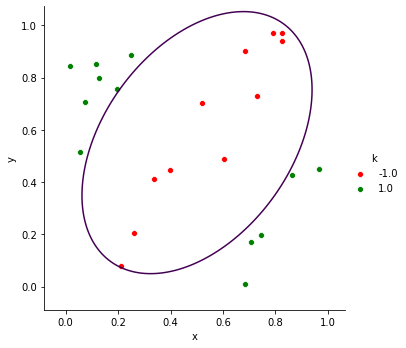

In [17]:
koz.get_plot(df_train, w1)

<Figure size 720x576 with 0 Axes>

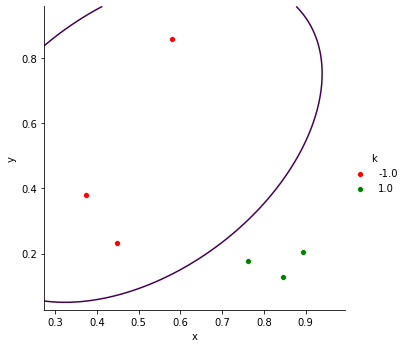

In [18]:
koz.get_plot(df_test, w1)

In [19]:
with open('train_02.json', 'r') as myfile:
    data=myfile.read()
obj = json.loads(data)

df = get_df(obj)
df_train, df_test, w1, x_train, x_test, k_train, k_test = tt_split(df)



(31, 3)
(8, 3)


In [20]:
koz1 = Kozinets_alg()
w1 = koz1.Kozinets_algorythm(df_train, x_train, k_train, w1)



<Figure size 720x576 with 0 Axes>

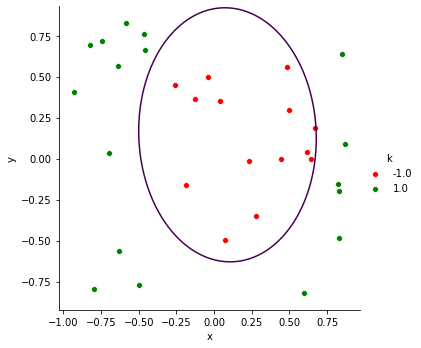

In [21]:
koz.get_plot(df_train, w1)

<Figure size 720x576 with 0 Axes>

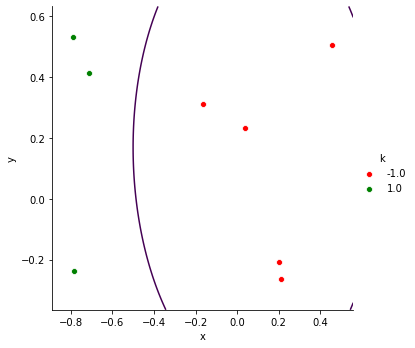

In [22]:
koz.get_plot(df_test, w1)

In [23]:
doctest.testmod()

TestResults(failed=0, attempted=10)